## (Ford Go Bike Visualization)
## by (Phillip Ayebare)

## Investigation Overview

> In this presentation I will analyze the Ford GoBike rider data from February 2019 and my visualization will focus on the duration, start_time(day, hour), user type, gender and age to have a demographic overview of the users of bike useage patterns.

## Dataset Overview

> There are 183,412 data trips for fordgobike in the dataset with 16 features which include: duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender and bike_share_for_all_trip. 

> We are going to provide polished vizualizations to explore the common trends of the bie rider trip data to include univariate, bivariate and multivariate relationships between different variables like age, trip duration, trip distances and common user types (Customer and subscribers)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('trip_data.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_year,end_year,start_month,end_month,start_weekday,end_weekday,start_hour,end_hour,duration_min,age_bins
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,2019,2019,2,3,Thursday,Friday,23,0,26.416667,40-50
1,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,2019,2019,2,3,Thursday,Friday,23,0,19.116667,30-40
2,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,2019,2019,2,3,Thursday,Friday,23,0,26.916667,20-30
3,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,2019,2019,2,3,Thursday,Friday,23,0,26.166667,30-40
4,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,2019,2019,2,3,Thursday,Friday,23,0,17.483333,20-30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168271 entries, 0 to 168270
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             168271 non-null  int64  
 1   start_time               168271 non-null  object 
 2   end_time                 168271 non-null  object 
 3   start_station_id         168079 non-null  float64
 4   start_station_name       168079 non-null  object 
 5   start_station_latitude   168271 non-null  float64
 6   start_station_longitude  168271 non-null  float64
 7   end_station_id           168079 non-null  float64
 8   end_station_name         168079 non-null  object 
 9   end_station_latitude     168271 non-null  float64
 10  end_station_longitude    168271 non-null  float64
 11  bike_id                  168271 non-null  int64  
 12  user_type                168271 non-null  object 
 13  member_gender            168271 non-null  object 
 14  bike

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of rider duration)

> 99% of bike rides had a duration of less than 53 minutes Average trip duration fell within the range of 5 - 15 minutes in a normal distribution. This could be due to built environment characteristics such as population density, job density, bicycle and public transit infrastructure, street design, land-use mix and proximity to central areas - near bike-sharing stations (for docking bikes) or previous drop off locations (for bikes in a dockless system). Next, Lets do away with the outliers that rode for more than 70 minutes for purposes of thorough viz.

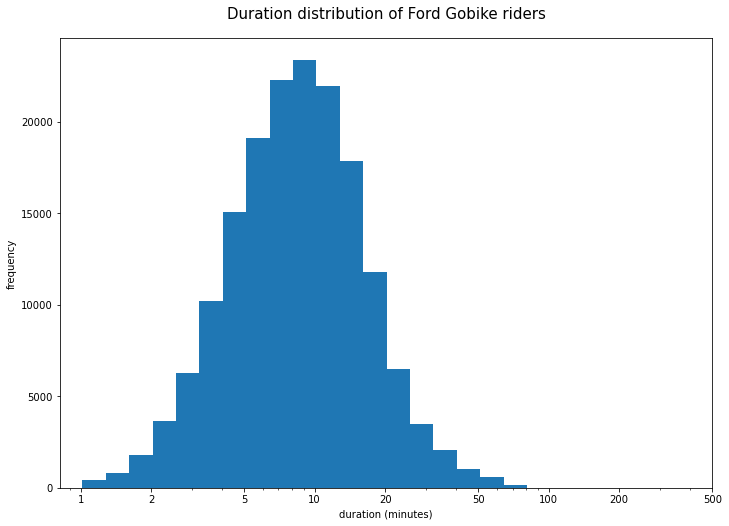

In [4]:
plt.figure(figsize=[11.69, 8.27])
bins= 10** np.arange(np.log10(df.duration_min.min()), np.log10(df.duration_min.max())+0.1, 0.1)
plt.hist(data=df, x='duration_min',bins=bins)
plt.xscale('log')
plt.xticks([1,2,5,10,20,50,100,200,500], [1,2,5,10,20,50,100,200,500])
plt.xlabel('duration (minutes)')
plt.title("Duration distribution of Ford Gobike riders", fontsize=15, y=1.03)
plt.ylabel('frequency');

## (Gender distribution of the riders)

> Men riders outweigh female riders. over 75% of bike rides are by males

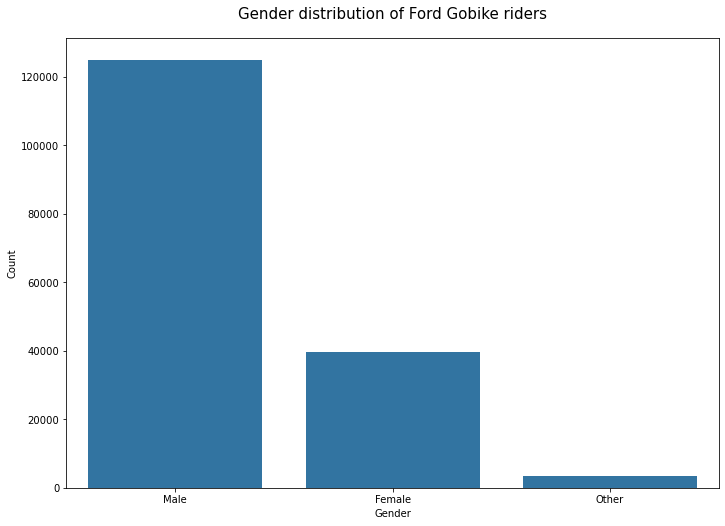

In [5]:
plt.figure(figsize=[ 11.69, 8.27])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.title("Gender distribution of Ford Gobike riders", fontsize=15, y=1.03)
plt.ylabel('Count');

## (User_type distribution)

> As expected, subscribers were the common users of the bike sharing service

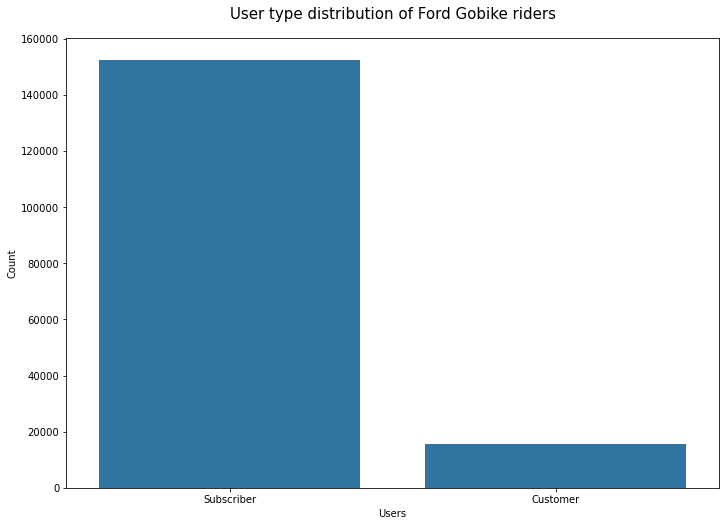

In [6]:
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data=df, x='user_type', color=base_color);
plt.xlabel('Users');
plt.title("User type distribution of Ford Gobike riders", fontsize=15, y=1.03)
plt.ylabel('Count');

## (Daily trend of riders)

> There ars more rides on Tuesday, Wednesday and Thursday (midweek) probably because people mainly leave their homes for different errands around the city. We can only find trends for day of the week becasue all the data is collected in 2019 in the month of February

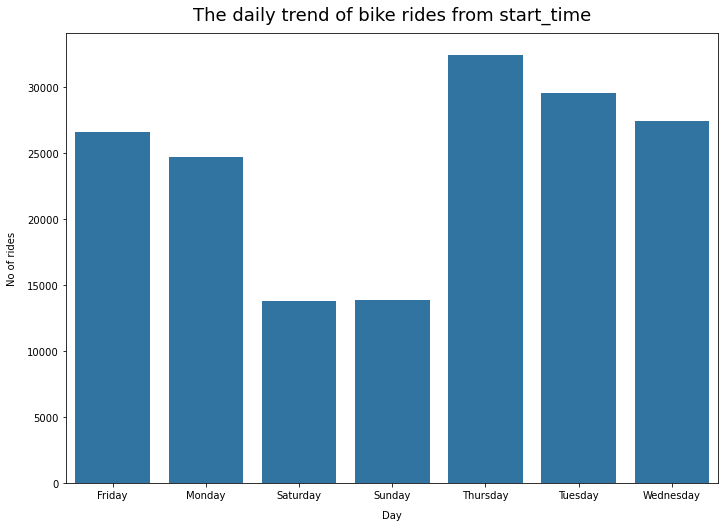

In [7]:
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(x='start_weekday', color=base_color, data=df.sort_values(by='start_weekday'))
plt.title('The daily trend of bike rides from start_time', fontsize=18, y=1.015)
plt.xlabel('Day', labelpad=10)
plt.ylabel('No of rides', labelpad=10);

## (Hourly trends of riders)
> It's not surprising that the most active hours are 8-9am and 17-18 hrs which are also peak hours for origin and destination trips

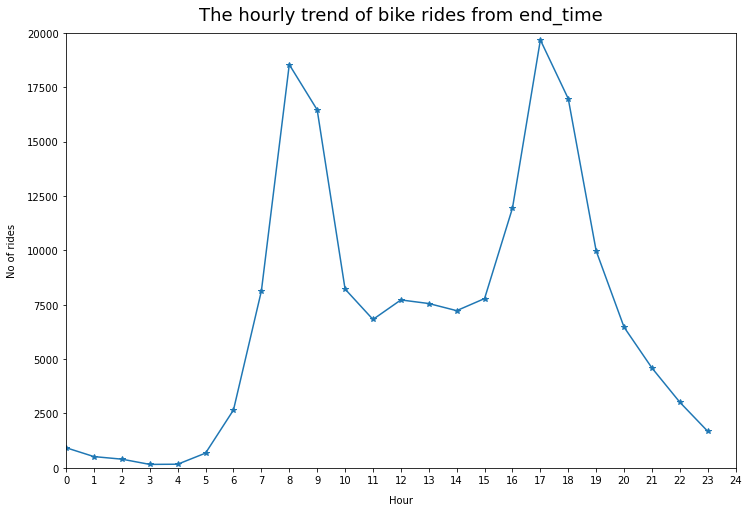

In [8]:
plt.figure(figsize=[ 11.69, 8.27])
ax = df.groupby('end_hour')['bike_id'].count().plot(kind='line', color=base_color, figsize=(12,8),linestyle='-', marker='*')
ax.set_xlim([0,24])
ax.set_ylim([0,20000])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.title('The hourly trend of bike rides from end_time', fontsize=18, y=1.015)
plt.xlabel('Hour', labelpad=10)
plt.ylabel('No of rides', labelpad=10);


## (Bike rides per age group )
> Age group 20-30 has the highest number of rides with 70115.

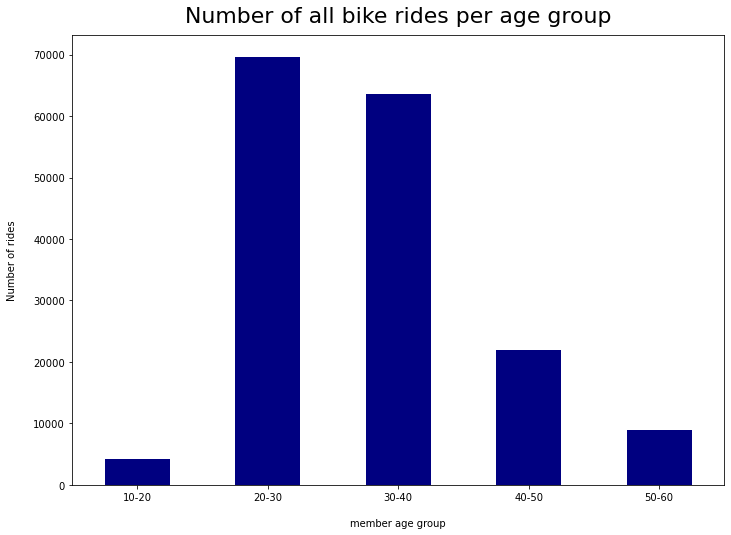

In [9]:
df['age_bins'] = pd.cut(x=df['member_age'], bins=[10, 20, 30, 40, 50, 60], 
                              labels=['10-20', '20-30', '30-40','40-50','50-60'])
new_color = ['navy']
df.groupby('age_bins')['bike_id'].count().plot(kind='bar', color=new_color, figsize=[ 11.69, 8.27])
plt.title('Number of all bike rides per age group', fontsize=22, y=1.015)
plt.xlabel('member age group', labelpad=16)
plt.ylabel('Number of rides', labelpad=16)
plt.xticks(rotation=360)
plt.savefig('image05.png');

## (Trip duration between customers and subscribers)
> Subscribers ride less minutes than customers who seem to rent the bikes longer. Average trip duration for customers is 12 minutes compared to 9 minutes for subscribers

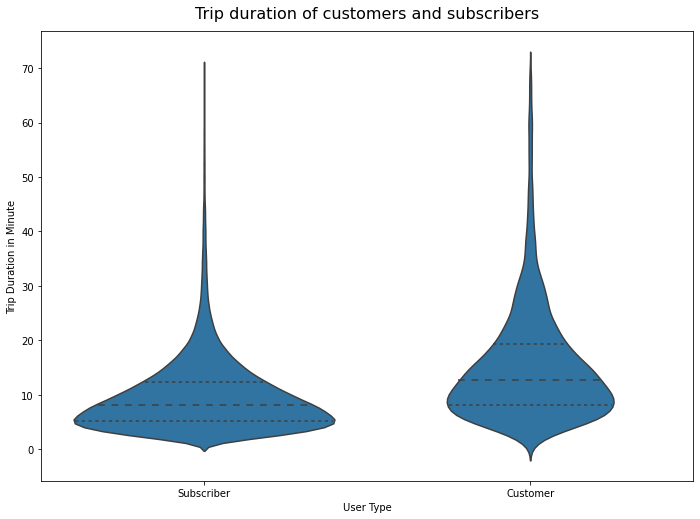

In [10]:
plt.figure(figsize=[ 11.69, 8.27])
ax =sb.violinplot(data=df, x='user_type', y='duration_min', color=base_color, inner='quartile')

plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('Trip duration of customers and subscribers', fontsize=16, y=1.015);

## (Hourly trend of bike ride between customers and subscribers)
> Again subscribers have more riders per day than customers. Subscribers and customner have two distinct peaks between 8-9am and 5-6pm, although customers seem to have a steady trend between midmorning to early afternoon hours.

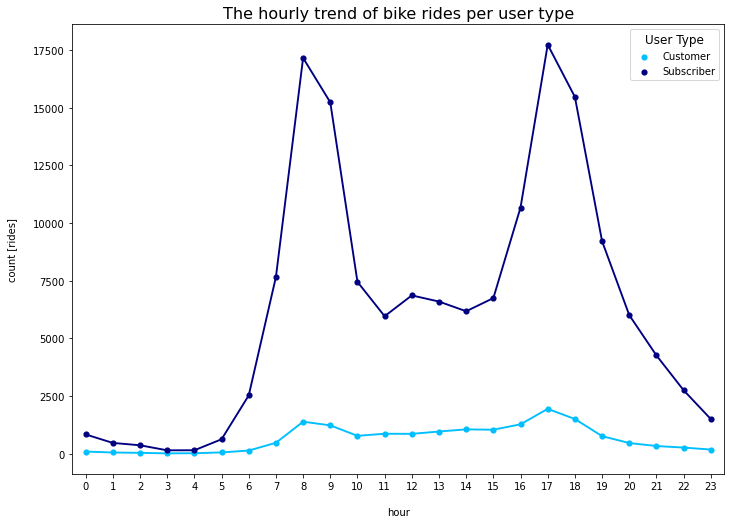

In [11]:
user_hours = df.groupby(['end_hour','user_type']).size().reset_index()
plt.figure(figsize=[ 11.69, 8.27])
my_palette = {'Subscriber':'navy', 'Customer':'deepskyblue'}
ax = sb.pointplot(x='end_hour', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_hours)
plt.title('The hourly trend of bike rides per user type', fontsize=16)
plt.xlabel('hour', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':12})
ax = plt.gca()
#plt.savefig('image09.png');

## (Average trip duration per user group)
> Customer trips last way longer than subscriber trips at 15.36 minutes on average compared to 9.84 mins for subscribers.

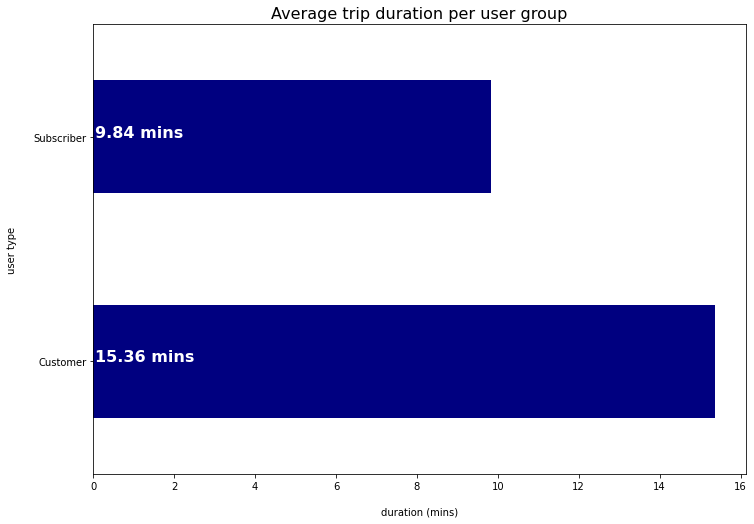

In [12]:
duration_usertype = df.groupby("user_type")["duration_min"].mean().reset_index()
duration_usertype

ax = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(11.69, 8.27))
ax.set_title('Average trip duration per user group', fontsize=16)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('duration (mins)', labelpad=16)

for i,j in enumerate(duration_usertype['duration_min']):
    ax.text(.03,i,str(round(j,2))+' mins', weight='bold', ha='left', fontsize=16, color="white")

## (Daily user type cycling trends )
> Subscribers' rides take place around commute time, on the contrary customers' rides take place the most during weekend, which represents the main purpose for the user type is different. The former is for convenience around commute time and the latter is more likely for leisure.

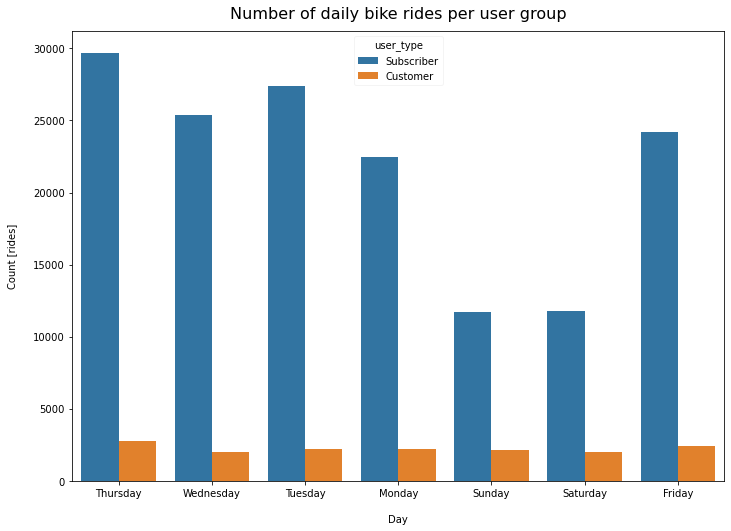

In [13]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.countplot(data = df, x = 'start_weekday', hue = 'user_type')
ax.legend(loc = 9, framealpha = 0.2, title = 'user_type');
plt.title('Number of daily bike rides per user group', fontsize=16, y=1.015)
plt.xlabel('Day', labelpad=16)
plt.ylabel('Count [rides]', labelpad=16);

## (Hourly trend of subscribers age groups)
> 10 to 20 years old group might not be qualified for the criteria becaue they have very few rides throughout the day. the rest of the user groups espouse a similar pattern of peak hour rides between 8-9am and 5-6pm. The 20-30s ad 30-40s subscribers contribute most to the number of riders. The older one grows the less one is likely to cycle.This could be due to accrued status and finanical stability or health related. Dockless bike-sharing systems are suggested to be more popular among young or middle-aged groups

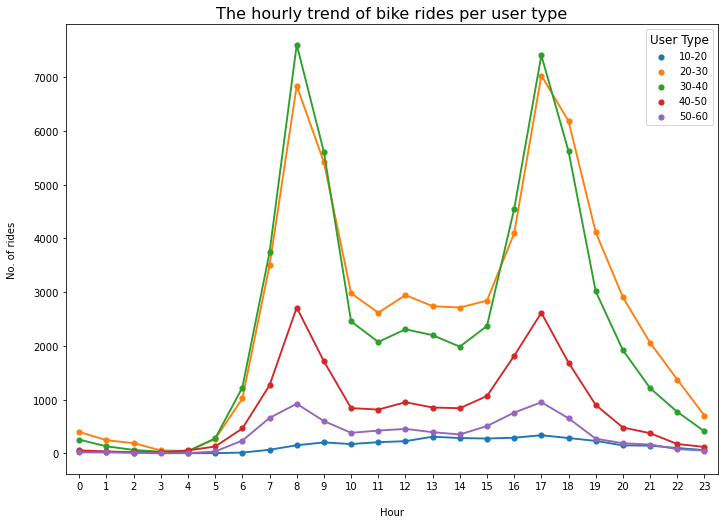

In [14]:
sub_age = df[df['user_type']=='Subscriber'].groupby(['start_hour', 'age_bins']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize=[ 11.69, 8.27])
ax = sb.pointplot(x='start_hour', y='bike_id', hue='age_bins', scale=.7, data=sub_age)
plt.title('The hourly trend of bike rides per user type', fontsize=16)
plt.xlabel('Hour', labelpad=16)
plt.ylabel('No. of rides', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':12})
ax = plt.gca()

## (Daily bike ride distance covered per user group)
> Inasmuch as the plot may be misleading by making a small difference in distance travelled seem much larger than it actually is by zooming in on the difference, Females travel longer than males by 110m everyday except for friday and the weekend where they travel less km. 

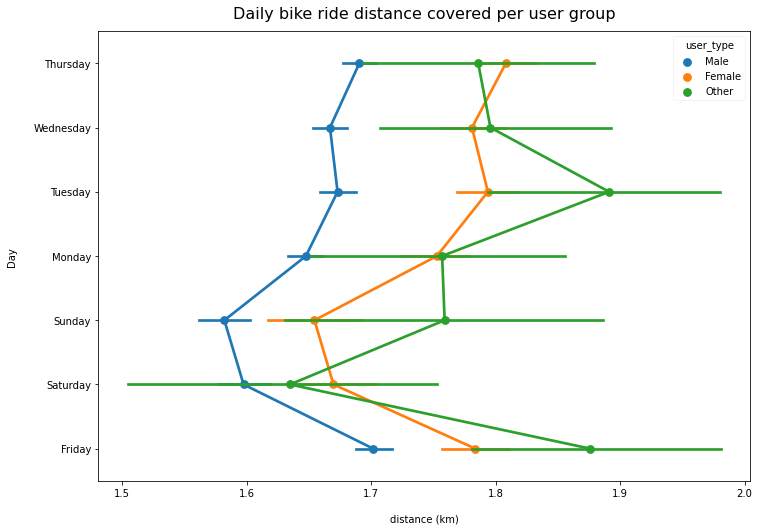

In [15]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.pointplot(data = df, y = 'start_weekday',x="distance_km", hue = 'member_gender')
ax.legend(loc='middle right', framealpha = 0.2, title = 'user_type');
plt.title('Daily bike ride distance covered per user group', fontsize=16, y=1.015)
plt.ylabel('Day', labelpad=16)
plt.xlabel('distance (km)', labelpad=16);

## (Bike ride distance covered per age group per user group)
> Inasmuch as the plot may be misleading by making a small difference in distance travelled seem much larger than it actually is by zooming in on the difference, customers travel longer than males by over 300m for all age groups. There is a similar trend where distance covered peaks in ones mid ages and reduces in later years (40 and above) for both customers and subscribers

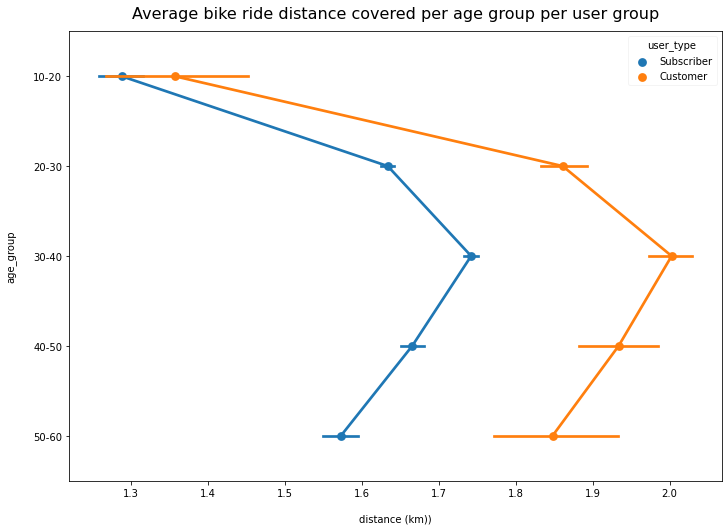

In [16]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.pointplot(data = df, y = 'age_bins',x="distance_km", hue = 'user_type')
ax.legend(loc='middle right', framealpha = 0.2, title = 'user_type');
plt.title('Average bike ride distance covered per age group per user group', fontsize=16, y=1.015)
plt.ylabel('age_group', labelpad=16)
plt.xlabel('distance (km))', labelpad=16);

## (Bike ride trip duration per age group per user group)
> For subscribers the trip duration is higher for older age - though not significantly. The same trend is seen among customers where 50-60 yr olds ride longer than 20-50 year olds. Bizzare but probably because of health related reasons.

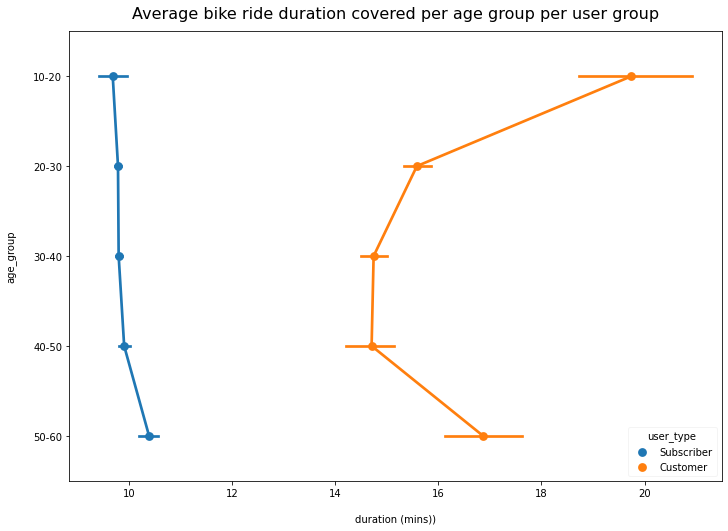

In [17]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.pointplot(data = df, y = 'age_bins',x="duration_min", hue = 'user_type')
ax.legend(loc='middle right', framealpha = 0.2, title = 'user_type');
plt.title('Average bike ride duration covered per age group per user group', fontsize=16, y=1.015)
plt.ylabel('age_group', labelpad=16)
plt.xlabel('duration (mins))', labelpad=16);

## Summary

> Generally, around 90% of rides take place on weekday. Also, more than 70% of users are in 20 to 40 years old age(when mean age is 30). Plus, 75% of bike rides by male. Moreover, the peak bike rides time for all members is around commute time(a quarter of the total rides happen exactly at 8am and 5pm). It can be inferred that the more common riders are 30 year old male subscribers riding an average of 1.7km on Thurday and Friday and averaging 10-12 minutes per ride (longer than other days)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [23]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 792630 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/anaconda3/lib/python3.8/site-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 510, in

In [24]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')